# Understanding Data Batches in Deep Learning

In deep learning, especially with standardized datasets like CIFAR-10, data is often stored in *batches* rather than as individual image files. This is done for efficiency:

- **Batch files** (like `data_batch_1` through `data_batch_5`) each contain thousands of images, stored as Numpy arrays of raw pixel values.
- **Why batches?** Loading 50,000 individual small images from disk is slow. Loading a few large batch files is much faster for both CPUs and GPUs.
- **How do we use them?** Libraries like PyTorch's `torchvision.datasets.CIFAR10` know how to open these batch files and convert them back into images for your model.

This approach is common in deep learning to speed up data loading and training.

# Inspecting CIFAR-10 Batch Files

The CIFAR-10 dataset is distributed as several files named `data_batch_1` through `data_batch_5` (for training) and `test_batch` (for testing). Each batch file contains 10,000 images stored as Numpy arrays, not as individual image files.

- These files are located in the `data/cifar-10-batches-py/` directory after running the setup script.
- Each file is a Python pickle containing a dictionary with image data and labels.

Let's inspect the contents of one of these batch files to see how the data is stored.

In [6]:
import pickle
import numpy as np
import os

# Path to a CIFAR-10 batch file
batch_file = '../data/cifar-10-batches-py/data_batch_1'

with open(batch_file, 'rb') as f:
    batch = pickle.load(f, encoding='bytes')

print(f"Keys in batch file: {list(batch.keys())}")
print(f"Shape of data array: {batch[b'data'].shape}")
print(f"First 10 labels: {batch[b'labels'][:10]}")

Keys in batch file: [b'batch_label', b'labels', b'data', b'filenames']
Shape of data array: (10000, 3072)
First 10 labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]


# Visualizing CIFAR-10 Images with PyTorch

Now let's use PyTorch and torchvision to load the CIFAR-10 dataset and visualize the first 10 images with their class labels. This is a common step in Exploratory Data Analysis (EDA) to get a sense of what the data looks like.

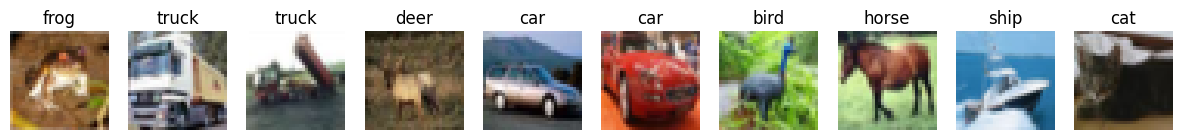

In [7]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Load a small piece of the data
cifar10 = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the first 10 images
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i in range(10):
    img, label = cifar10[i]
    axes[i].imshow(np.asarray(img))
    axes[i].set_title(classes[label])
    axes[i].axis('off')
plt.show()

# Ensuring .gitignore is Properly Configured

To avoid accidentally committing large datasets or unnecessary files, make sure your `.gitignore` file is present in the root directory and contains the correct entries. For this project, it should include:

- `data/` (to ignore the dataset)
- `models/` (to ignore saved models)
- `venv/`, `.venv/`, `__pycache__/` (to ignore environments and Python cache)
- `runs/` (to ignore TensorBoard logs)
- `.ipynb_checkpoints/`, `.vscode/`, `.DS_Store` (to ignore IDE and OS files)

Let's check that the file exists and print its contents.

In [8]:
# Check for .gitignore and print its contents
import os

gitignore_path = '../.gitignore'
if os.path.exists(gitignore_path):
    with open(gitignore_path, 'r') as f:
        print(f.read())
else:
    print(".gitignore file not found in the root directory!")

# Data and Models
data/
models/
*.pt
*.pth

# Python environment and cache
venv/
.venv/
__pycache__/
*.py[cod]

# OS and IDE files
.DS_Store
.vscode/
.ipynb_checkpoints/

# Logs
runs/

#personal notes
notes/

